# Amazon Prime Video Rating Prediction & Analysis

In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
import sklearn as sl
from sklearn import preprocessing
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import warnings
warnings.filterwarnings('ignore')

# Part 1: Data Exploration

                a. Understand the Raw Dataset
                b. Check Missing Values
                c. Check Duplicates
                d. Understand Numerical Features 
                        1. feature distribution
                        2. feature correaltion
                e. Understand Categorical Features
                        1. feature distribution

## a. Understand Raw Dataset

In [2]:
TV = pd.read_csv('TVdata.txt', sep = ',', header = 0)
TV.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
0,385504,307127.606,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.500,112.301,51,other award,PG-13,1.710
1,300175,270338.426,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.500,94.983,41,no award,R,3.250
2,361899,256165.867,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.300,115.764,58,other award,R,2.647
3,308314,196622.721,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,15700000,7.600,130.704,94,Oscar,R,1.667
4,307201,159841.652,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,8551228,6.400,105.546,37,other award,R,3.067


In [3]:
print('Number of Rows:' + str(TV.shape[0]) )
print('Number of Columns:' + str(TV.shape[1]))

Number of Rows:4226
Number of Columns:16


In [4]:
TV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 16 columns):
video_id                         4226 non-null int64
cvt_per_day                      4226 non-null float64
weighted_categorical_position    4226 non-null int64
weighted_horizontal_poition      4226 non-null int64
import_id                        4226 non-null object
release_year                     4226 non-null int64
genres                           4226 non-null object
imdb_votes                       4226 non-null int64
budget                           4226 non-null int64
boxoffice                        4226 non-null int64
imdb_rating                      4226 non-null float64
duration_in_mins                 4226 non-null float64
metacritic_score                 4226 non-null int64
awards                           4226 non-null object
mpaa                             4226 non-null object
star_category                    4226 non-null float64
dtypes: float64(4), int64(8), obj

In [5]:
TV.describe()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
count,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000
mean,280371.163,4218.630,7.783,28.104,2001.057,6462.924,2150743.439,2536338.472,5.257,89.556,15.974,0.955
std,112640.128,13036.080,6.134,11.864,17.497,31596.007,7176604.483,8243516.266,2.123,21.086,26.205,0.955
min,7909.000,2.188,1.000,1.000,1916.000,0.000,0.000,0.000,0.000,4.037,0.000,0.000
25%,285104.250,351.169,4.000,20.000,1998.000,81.000,0.000,0.000,4.300,82.602,0.000,0.000
50%,313891.500,1193.500,6.000,28.000,2008.000,535.000,0.000,0.000,5.800,90.730,0.000,1.000
75%,349345.750,3356.789,9.000,36.000,2012.000,3053.000,1500000.000,0.000,6.800,99.500,41.000,1.667
max,394880.000,307127.606,41.000,70.000,2017.000,948630.000,107000000.000,184208848.000,10.000,246.017,100.000,4.000


In [6]:
num_video = len(TV.video_id.unique())

print('There are {} unique movies in this data set'.format(num_video))

There are 4226 unique movies in this data set


## b. Check Missing Values

In [7]:
(TV==0).sum()

video_id                            0
cvt_per_day                         0
weighted_categorical_position       0
weighted_horizontal_poition         0
import_id                           0
release_year                        0
genres                              0
imdb_votes                        344
budget                           2454
boxoffice                        3194
imdb_rating                       344
duration_in_mins                    0
metacritic_score                 3012
awards                              0
mpaa                                0
star_category                    1846
dtype: int64

here we have missing values: `imdb_votes`, `budget`, `boxoffice`, `imdb_rating`, `metacritic_score`, `star_category`

In [8]:
# calcuate total number of entries in matrix
num_entries = TV.shape[0] * TV.shape[1]


# calculate total number of entries with zero values
num_zeros = (TV==0).sum(axis=1).sum()

# calculate ratio of number of zeros to number of entries
ratio_zeros = num_zeros / num_entries
print('There is about {:.2%} of our data is missing'.format(ratio_zeros))

There is about 16.56% of our data is missing



## c. Check Duplicate Values

In [9]:
if len(TV.iloc[np.where(TV[['video_id']].duplicated())])==0:
    print('There is no duplicated entry.')

There is no duplicated entry.


## d. Understand the Numerical Features

In [10]:
TV.drop(['video_id', 'release_year'],axis=1).describe()

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
count,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000
mean,4218.630,7.783,28.104,6462.924,2150743.439,2536338.472,5.257,89.556,15.974,0.955
std,13036.080,6.134,11.864,31596.007,7176604.483,8243516.266,2.123,21.086,26.205,0.955
min,2.188,1.000,1.000,0.000,0.000,0.000,0.000,4.037,0.000,0.000
25%,351.169,4.000,20.000,81.000,0.000,0.000,4.300,82.602,0.000,0.000
50%,1193.500,6.000,28.000,535.000,0.000,0.000,5.800,90.730,0.000,1.000
75%,3356.789,9.000,36.000,3053.000,1500000.000,0.000,6.800,99.500,41.000,1.667
max,307127.606,41.000,70.000,948630.000,107000000.000,184208848.000,10.000,246.017,100.000,4.000


### `'cvt_per_day'` Distribution

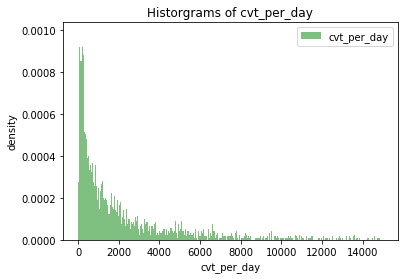

count     4226.000
mean      4218.630
std      13036.080
min          2.188
10%        141.985
20%        262.808
30%        476.234
40%        764.303
50%       1193.500
60%       1771.111
70%       2667.212
80%       4383.200
90%       7930.121
max     307127.606
Name: cvt_per_day, dtype: float64


In [11]:
plt.hist(TV['cvt_per_day'].values, bins = range(0,15000, 30), alpha = 0.5, color='g', label = 'cvt_per_day', density = True)
plt.legend(loc ='upper right')
plt.title('Historgrams of cvt_per_day')
plt.xlabel('cvt_per_day')
plt.ylabel('density')
plt.show()

print(TV['cvt_per_day'].describe(percentiles = [.9,.8,.7,.6,.5,.4,.3,.2,.1]))


### Correlation among Numerical Features

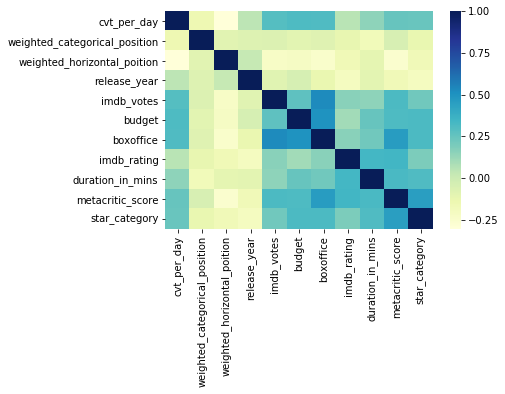

In [12]:
corr = TV[['cvt_per_day','weighted_categorical_position','weighted_horizontal_poition'
               ,'release_year', 'imdb_votes', 'budget', 'boxoffice' ,'imdb_rating', 
               'duration_in_mins', 'metacritic_score', 'star_category']].corr()

# heapmap of correlations
sns.heatmap(corr, cmap="YlGnBu")

In [13]:
corr

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
cvt_per_day,1.000,-0.148,-0.302,0.046,0.298,0.316,0.312,0.059,0.152,0.249,0.247
weighted_categorical_position,-0.148,1.000,-0.084,-0.069,-0.064,-0.090,-0.074,-0.116,-0.174,-0.044,-0.123
weighted_horizontal_poition,-0.302,-0.084,1.000,0.027,-0.221,-0.211,-0.245,-0.162,-0.102,-0.255,-0.168
release_year,0.046,-0.069,0.027,1.000,-0.083,-0.040,-0.128,-0.199,-0.097,-0.167,-0.198
imdb_votes,0.298,-0.064,-0.221,-0.083,1.000,0.273,0.531,0.163,0.156,0.322,0.225
budget,0.316,-0.090,-0.211,-0.040,0.273,1.000,0.505,0.106,0.251,0.315,0.322
boxoffice,0.312,-0.074,-0.245,-0.128,0.531,0.505,1.000,0.164,0.226,0.465,0.322
imdb_rating,0.059,-0.116,-0.162,-0.199,0.163,0.106,0.164,1.000,0.344,0.347,0.192
duration_in_mins,0.152,-0.174,-0.102,-0.097,0.156,0.251,0.226,0.344,1.000,0.327,0.309
metacritic_score,0.249,-0.044,-0.255,-0.167,0.322,0.315,0.465,0.347,0.327,1.000,0.452


## e. Understand the Categorical Features

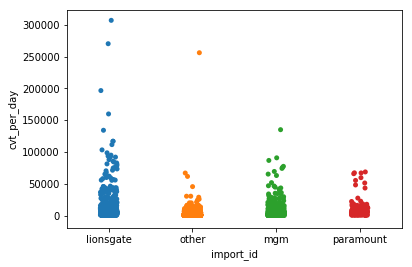

       index  import_id
0      other       2963
1  lionsgate        677
2        mgm        445
3  paramount        141


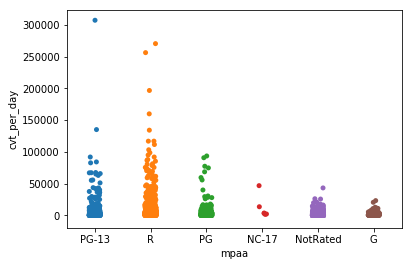

      index  mpaa
0  NotRated  2158
1         R  1158
2     PG-13   426
3        PG   353
4         G   125
5     NC-17     6


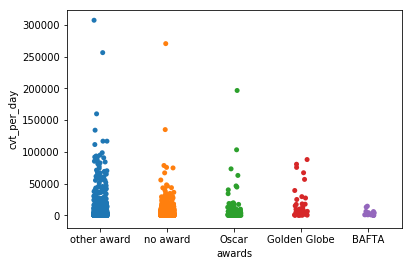

          index  awards
0      no award    2569
1   other award    1453
2         Oscar     141
3  Golden Globe      44
4         BAFTA      19


In [14]:
sns.stripplot(x='import_id', y='cvt_per_day', data=TV, jitter=True)
plt.show()
print(TV['import_id'].value_counts().reset_index())

sns.stripplot(x='mpaa', y='cvt_per_day', data=TV, jitter=True)
plt.show()
print (TV['mpaa'].value_counts().reset_index())

sns.stripplot(x='awards', y='cvt_per_day', data=TV, jitter=True)
plt.show()
print (TV['awards'].value_counts().reset_index())

### `'release_year'` Distribution

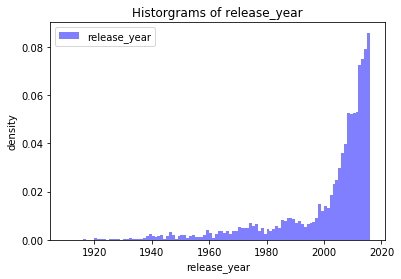

count   4226.000
mean    2001.057
std       17.497
min     1916.000
10%     1974.000
20%     1991.000
30%     2001.000
40%     2006.000
50%     2008.000
60%     2010.000
70%     2012.000
80%     2013.000
90%     2014.000
max     2017.000
Name: release_year, dtype: float64


In [15]:
# plt.figure(1)
plt.hist(TV['release_year'].values, bins = range(1910, 2017, 1), alpha = 0.5, color='b', label = 'release_year', density = True)
plt.legend(loc ='upper left')
plt.title('Historgrams of release_year')
plt.xlabel('release_year')
plt.ylabel('density')
plt.show()

print (TV['release_year'].describe(percentiles = [.1, .2, .3, .4,.5, .6, .7, .8, .9]))


### `'genre'` Distribution

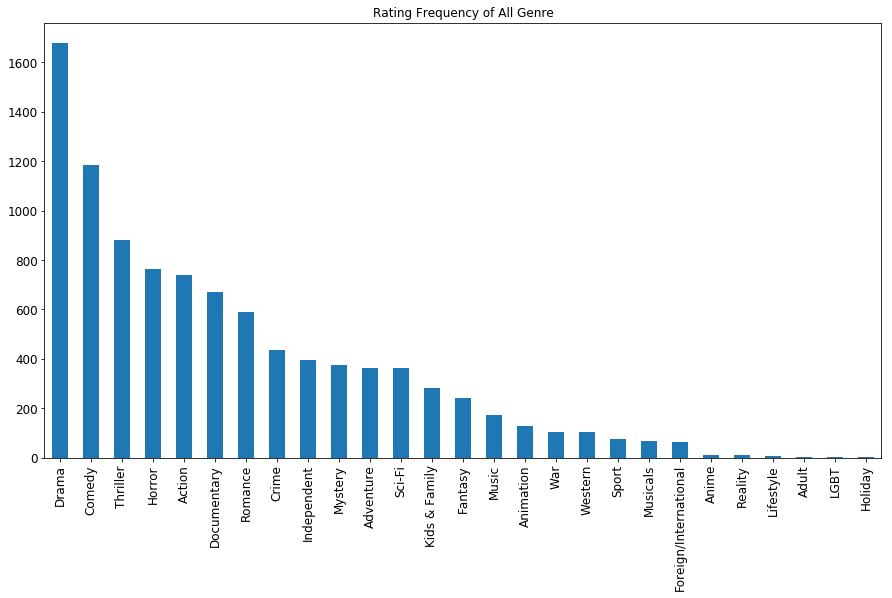

In [16]:
# split the genre of each video

gen_split = TV['genres'].str.get_dummies(sep=',').sum()

gen_split.sort_values(ascending=False).plot.bar(figsize=(15, 8), title='Rating Frequency of All Genre', fontsize=12)

# Part 2: Feature Preprocessing

                a. Convert Categorical Features
                b. Handle Missing Values 
                        1. Fill by mean
                        2. Fill by KNN Regressor
                c. Feature Splitting & Scaling
  

## a. Convert Categorical Features into Dummie Variables

In [17]:
TV.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
0,385504,307127.606,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.500,112.301,51,other award,PG-13,1.710
1,300175,270338.426,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.500,94.983,41,no award,R,3.250
2,361899,256165.867,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.300,115.764,58,other award,R,2.647
3,308314,196622.721,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,15700000,7.600,130.704,94,Oscar,R,1.667
4,307201,159841.652,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,8551228,6.400,105.546,37,other award,R,3.067


In [18]:
# one-hot encoding

d_import_id = pd.get_dummies(TV['import_id']).astype(np.int64)
d_mpaa = pd.get_dummies(TV['mpaa']).astype(np.int64)
d_awards = pd.get_dummies(TV['awards']).astype(np.int64)

In [19]:
# one-hot encoding + split metrics

d_gen_split = TV['genres'].str.get_dummies(sep=',')

In [20]:
# combine 6 smallest genres into a new genre 'Misc_gen'. Use bitwise operation '|', then drop these 6 columns.

d_gen_split['Misc_gen'] = d_gen_split['Anime']|d_gen_split['Reality']|d_gen_split['Lifestyle']|d_gen_split['Adult']|d_gen_split['LGBT']|d_gen_split['Holiday']
d_gen_split.drop(['Anime', 'Reality','Lifestyle', 'Adult','LGBT','Holiday'], inplace=True, axis=1)


In [21]:
bin_year = [1916, 1974, 1991, 2001, 2006, 2008, 2010, 2012, 2013, 2014,2017]
year_range = ['1916-1974', '1974-1991', '1991-2001', '2001-2006','2006-2008','2008-2010','2010-2012','2012-2013',
              '2013-2014','2014-2017']
year_bin = pd.cut(TV['release_year'], bin_year, labels=year_range)

d_year = pd.get_dummies(year_bin).astype(np.int64)

### New dataframe, drop the previous categorical features, add new dummy variables, check for null

In [22]:
TV_temp = TV.drop(['import_id', 'mpaa','awards','genres', 'release_year'], axis=1)
newTV = pd.concat([TV_temp, d_import_id, d_mpaa, d_awards, d_gen_split, d_year], axis=1)

In [23]:
newTV.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,...,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,385504,307127.606,1,3,69614,15000000,42930462,6.500,112.301,51,...,0,0,0,0,0,0,0,1,0,0
1,300175,270338.426,1,3,46705,15000000,3301046,6.500,94.983,41,...,0,0,0,0,0,0,0,1,0,0
2,361899,256165.867,1,3,197596,26000000,37397291,7.300,115.764,58,...,0,0,0,0,0,0,1,0,0,0
3,308314,196622.721,3,4,356339,15000000,15700000,7.600,130.704,94,...,0,0,0,0,1,0,0,0,0,0
4,307201,159841.652,1,3,46720,27220000,8551228,6.400,105.546,37,...,0,0,0,0,0,0,0,1,0,0


In [24]:
newTV.isnull().any().sum()

0

In [25]:
newTV_0 = newTV.copy() # a copy of newTV

## b. Missing Values

In [26]:
# mark zero values as NaN

newTV[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']] = newTV[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']].replace(0, np.nan)


In [28]:
newTV.isnull().sum()

video_id                            0
cvt_per_day                         0
weighted_categorical_position       0
weighted_horizontal_poition         0
imdb_votes                        344
budget                           2454
boxoffice                        3194
imdb_rating                       344
duration_in_mins                    0
metacritic_score                 3012
star_category                    1846
lionsgate                           0
mgm                                 0
other                               0
paramount                           0
G                                   0
NC-17                               0
NotRated                            0
PG                                  0
PG-13                               0
R                                   0
BAFTA                               0
Golden Globe                        0
Oscar                               0
no award                            0
other award                         0
Action      

We can see that 'imdb_votes', 'budget', 'boxoffice', 'imdb_rating', 'metacritic_score', 'star_category' are the metrics that have missing values.


'imdb_votes', 'budget', 'boxoffice', 'metacritic_score' have quite strength correlation with 'cv_per_day', which means these metrics may contain valuable information about the cvt_per_day; 

'imdb_rating' and 'star_category', at the other hand, are less informative


### fill in the less informative metrics with column mean

In [29]:
newTV['imdb_rating'].fillna(newTV['imdb_rating'].mean(), inplace=True)
newTV['star_category'].fillna(newTV['star_category'].mean(), inplace=True)

### fillin the missing values for informative metrics by trainning KNN Regressor

In [30]:
from sklearn.neighbors import KNeighborsRegressor

In [31]:
# select the rows with missing values as testing data

TV_with_nan = newTV.isnull().any(axis=1)
X_test = newTV[TV_with_nan]
X_test.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,...,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
9,393463,111565.597,2,7,nan,nan,nan,5.723,94.748,nan,...,0,0,0,0,0,1,0,0,0,0
56,306801,51211.221,5,7,3301.000,nan,nan,5.500,72.673,nan,...,0,0,1,0,0,0,0,0,0,0
90,393887,34508.669,16,7,nan,nan,nan,5.723,94.188,nan,...,0,1,0,0,0,0,0,0,0,0
96,345995,32166.755,15,1,493.000,nan,nan,5.100,90.578,nan,...,0,0,0,1,0,0,0,0,0,0
104,394073,29581.918,4,10,nan,nan,nan,5.723,110.302,nan,...,0,1,0,0,0,0,0,0,0,0


In [32]:
# select the rows without missing values as training data

X_train = newTV[-TV_with_nan]
X_train.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,...,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,385504,307127.606,1,3,69614.000,15000000.000,42930462.000,6.500,112.301,51.000,...,0,0,0,0,0,0,0,1,0,0
1,300175,270338.426,1,3,46705.000,15000000.000,3301046.000,6.500,94.983,41.000,...,0,0,0,0,0,0,0,1,0,0
2,361899,256165.867,1,3,197596.000,26000000.000,37397291.000,7.300,115.764,58.000,...,0,0,0,0,0,0,1,0,0,0
3,308314,196622.721,3,4,356339.000,15000000.000,15700000.000,7.600,130.704,94.000,...,0,0,0,0,1,0,0,0,0,0
4,307201,159841.652,1,3,46720.000,27220000.000,8551228.000,6.400,105.546,37.000,...,0,0,0,0,0,0,0,1,0,0


### 1. `'imdb_votes'`

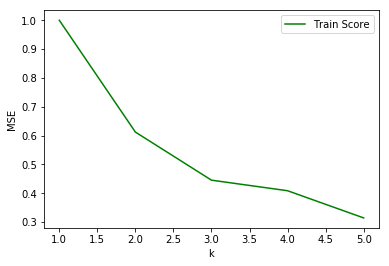

In [33]:
# Train & Tune hyperparameter k 

train_score_array = []

for k in range(1, 6):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train[['cvt_per_day','weighted_categorical_position','weighted_horizontal_poition',
               'duration_in_mins', 'imdb_rating', 'star_category']], X_train['imdb_votes'])
    train_score_array.append(knn_reg.score(X_train[['cvt_per_day','weighted_categorical_position','weighted_horizontal_poition',
               'duration_in_mins', 'imdb_rating', 'star_category']], X_train['imdb_votes']))
       
x_axis = range(1, 6)
plt.plot(x_axis, train_score_array, c='g', label = "Train Score")
plt.xlabel('k')
plt.ylabel('MSE')
plt.legend()

It seems like we have the minimum MSE when k = 3

In [34]:
#set imdb_votes as target variable and train the model

clf = KNeighborsRegressor(3, weights='distance')  # 3NN
clf.fit(X_train[['cvt_per_day','weighted_categorical_position','weighted_horizontal_poition',
               'duration_in_mins', 'imdb_rating', 'star_category']], X_train['imdb_votes'])


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='distance')

In [35]:
# Prediction

x_imputed = clf.predict(X_test[['cvt_per_day','weighted_categorical_position','weighted_horizontal_poition',
               'duration_in_mins', 'imdb_rating', 'star_category']])
newTV_1 = newTV.copy()
newTV_1.loc[TV_with_nan,'imdb_votes'] = x_imputed.reshape(-1, 1)
newTV_1.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,...,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,385504,307127.606,1,3,69614.000,15000000.000,42930462.000,6.500,112.301,51.000,...,0,0,0,0,0,0,0,1,0,0
1,300175,270338.426,1,3,46705.000,15000000.000,3301046.000,6.500,94.983,41.000,...,0,0,0,0,0,0,0,1,0,0
2,361899,256165.867,1,3,197596.000,26000000.000,37397291.000,7.300,115.764,58.000,...,0,0,0,0,0,0,1,0,0,0
3,308314,196622.721,3,4,356339.000,15000000.000,15700000.000,7.600,130.704,94.000,...,0,0,0,0,1,0,0,0,0,0
4,307201,159841.652,1,3,46720.000,27220000.000,8551228.000,6.400,105.546,37.000,...,0,0,0,0,0,0,0,1,0,0


### 2. `'budget'`

In [36]:
clf2 = KNeighborsRegressor(3, weights='distance')  # 3NN
clf2.fit(X_train[['cvt_per_day','weighted_categorical_position','weighted_horizontal_poition',
               'duration_in_mins', 'imdb_rating', 'star_category']], X_train['budget'])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='distance')

In [37]:
x_imputed2 = clf.predict(X_test[['cvt_per_day','weighted_categorical_position','weighted_horizontal_poition',
               'duration_in_mins', 'imdb_rating', 'star_category']])
newTV_2 = newTV_1.copy()
newTV_2.loc[TV_with_nan,'budget'] = x_imputed2.reshape(-1, 1)
newTV_2.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,...,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,385504,307127.606,1,3,69614.000,15000000.000,42930462.000,6.500,112.301,51.000,...,0,0,0,0,0,0,0,1,0,0
1,300175,270338.426,1,3,46705.000,15000000.000,3301046.000,6.500,94.983,41.000,...,0,0,0,0,0,0,0,1,0,0
2,361899,256165.867,1,3,197596.000,26000000.000,37397291.000,7.300,115.764,58.000,...,0,0,0,0,0,0,1,0,0,0
3,308314,196622.721,3,4,356339.000,15000000.000,15700000.000,7.600,130.704,94.000,...,0,0,0,0,1,0,0,0,0,0
4,307201,159841.652,1,3,46720.000,27220000.000,8551228.000,6.400,105.546,37.000,...,0,0,0,0,0,0,0,1,0,0


### 3. `'boxoffice'`

In [38]:
clf3 = KNeighborsRegressor(3, weights='distance')  # 3NN
clf3.fit(X_train[['cvt_per_day','weighted_categorical_position','weighted_horizontal_poition',
               'duration_in_mins', 'imdb_rating', 'star_category']], X_train['boxoffice'])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='distance')

In [39]:
x_imputed3 = clf.predict(X_test[['cvt_per_day','weighted_categorical_position','weighted_horizontal_poition',
               'duration_in_mins', 'imdb_rating', 'star_category']])
newTV_3 = newTV_2.copy()
newTV_3.loc[TV_with_nan,'boxoffice'] = x_imputed3.reshape(-1, 1)
newTV_3.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,...,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,385504,307127.606,1,3,69614.000,15000000.000,42930462.000,6.500,112.301,51.000,...,0,0,0,0,0,0,0,1,0,0
1,300175,270338.426,1,3,46705.000,15000000.000,3301046.000,6.500,94.983,41.000,...,0,0,0,0,0,0,0,1,0,0
2,361899,256165.867,1,3,197596.000,26000000.000,37397291.000,7.300,115.764,58.000,...,0,0,0,0,0,0,1,0,0,0
3,308314,196622.721,3,4,356339.000,15000000.000,15700000.000,7.600,130.704,94.000,...,0,0,0,0,1,0,0,0,0,0
4,307201,159841.652,1,3,46720.000,27220000.000,8551228.000,6.400,105.546,37.000,...,0,0,0,0,0,0,0,1,0,0


### 4. `'metacritic_score'`

In [40]:
clf4 = KNeighborsRegressor(3, weights='distance')  # 3NN
clf4.fit(X_train[['cvt_per_day','weighted_categorical_position','weighted_horizontal_poition',
               'duration_in_mins', 'imdb_rating', 'star_category']], X_train['metacritic_score'])


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='distance')

In [41]:
x_imputed4 = clf.predict(X_test[['cvt_per_day','weighted_categorical_position','weighted_horizontal_poition',
               'duration_in_mins', 'imdb_rating', 'star_category']])
newTV_4 = newTV_3.copy()
newTV_4.loc[TV_with_nan,'metacritic_score'] = x_imputed.reshape(-1, 1)
n_TV = newTV_4
n_TV.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,...,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,385504,307127.606,1,3,69614.000,15000000.000,42930462.000,6.500,112.301,51.000,...,0,0,0,0,0,0,0,1,0,0
1,300175,270338.426,1,3,46705.000,15000000.000,3301046.000,6.500,94.983,41.000,...,0,0,0,0,0,0,0,1,0,0
2,361899,256165.867,1,3,197596.000,26000000.000,37397291.000,7.300,115.764,58.000,...,0,0,0,0,0,0,1,0,0,0
3,308314,196622.721,3,4,356339.000,15000000.000,15700000.000,7.600,130.704,94.000,...,0,0,0,0,1,0,0,0,0,0
4,307201,159841.652,1,3,46720.000,27220000.000,8551228.000,6.400,105.546,37.000,...,0,0,0,0,0,0,0,1,0,0


In [42]:
n_TV.isnull().any().sum()

0

In [43]:
n_TV.describe()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,...,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
count,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,...,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000
mean,280371.163,4218.630,7.783,28.104,15691.150,1818122.721,2507640.834,5.723,89.556,9748.320,...,0.101,0.105,0.096,0.132,0.092,0.104,0.125,0.075,0.079,0.091
std,112640.128,13036.080,6.134,11.864,34013.852,7062888.435,8218967.632,1.434,21.086,16459.539,...,0.301,0.306,0.295,0.339,0.289,0.306,0.331,0.263,0.269,0.287
min,7909.000,2.188,1.000,1.000,363.000,10.000,840.016,1.000,4.037,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,285104.250,351.169,4.000,20.000,5835.930,6687.441,6675.295,4.900,82.602,3419.227,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,313891.500,1193.500,6.000,28.000,8622.593,11050.376,10933.132,5.800,90.730,6842.201,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,349345.750,3356.789,9.000,36.000,15341.457,43655.433,40073.955,6.800,99.500,11437.263,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,394880.000,307127.606,41.000,70.000,948630.000,107000000.000,184208848.000,10.000,246.017,351567.605,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [44]:
n_TV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 58 columns):
video_id                         4226 non-null int64
cvt_per_day                      4226 non-null float64
weighted_categorical_position    4226 non-null int64
weighted_horizontal_poition      4226 non-null int64
imdb_votes                       4226 non-null float64
budget                           4226 non-null float64
boxoffice                        4226 non-null float64
imdb_rating                      4226 non-null float64
duration_in_mins                 4226 non-null float64
metacritic_score                 4226 non-null float64
star_category                    4226 non-null float64
lionsgate                        4226 non-null int64
mgm                              4226 non-null int64
other                            4226 non-null int64
paramount                        4226 non-null int64
G                                4226 non-null int64
NC-17                        

##  c. Feature Splitting & Scaling

In [45]:
X = n_TV.drop(['video_id', 'cvt_per_day'], axis = 1)
y = n_TV['cvt_per_day']

# Featuer Splitting
from sklearn.model_selection import train_test_split 
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.20) 

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
X_train = scaler.fit_transform(X_train_org)  
X_test = scaler.transform(X_test_org) 

print('training data has %d observation with %d features'% X_train.shape)
print('test data has %d observation with %d features'% X_test.shape)

training data has 3380 observation with 56 features
test data has 846 observation with 56 features


In [46]:
y_train.head()

883    4174.038
2404    881.824
1699   1759.705
3380    262.808
2284   1006.808
Name: cvt_per_day, dtype: float64

# Part 3:  Model Training & Evaluation (Cross Validation + Grid Search)

                a. Linear Model with Normal Equation
                b. Polynomial Regression
                c. Ridge
                d. Lasso
                e. Random Forest
    

## 1. Linear with Normal Equation

In [47]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)

print('Accuracy on Train Score: {:.4f}'.format(lreg.score(X_train, y_train)))
print('Accuracy on Test Score: {:.4f}'.format(lreg.score(X_test, y_test)))

Accuracy on Train Score: 0.2917
Accuracy on Test Score: 0.2605


## 2. Polynomial Regression

In [49]:
from sklearn.preprocessing import PolynomialFeatures

train_score_list = []
test_score_list = []

for n in range(1, 3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))
    
print(train_score_list)
print(test_score_list)

[0.2918226591382279, 0.8853013778548392]
[0.2619771047499102, -1.160448984383914e+22]


## 3. Ridge with Polynomial Regressor

In [50]:
from sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100, 120, 150]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_poly,y_train)
    train_score_list.append(ridge.score(X_train_poly,y_train))
    test_score_list.append(ridge.score(X_test_poly, y_test))
    
print(train_score_list)
print(test_score_list)

[0.8668839361987952, 0.8235917970694318, 0.730281001774588, 0.5928607015298107, 0.4148006182120564, 0.3983116303768697, 0.3779251812710661]
[-0.05443318113687856, 0.28132631155770893, 0.3886894793599257, 0.39494315074477937, 0.3377592645742479, 0.32953284125644233, 0.3187413571733796]


Text(0.5, 0, '$\\alpha$')

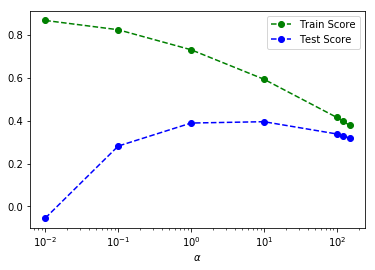

In [51]:
plt.plot(x_range, train_score_list, c = 'g', linestyle='dashed', marker='o', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b',linestyle='dashed', marker='o', label = 'Test Score')
plt.xscale('log')    #？
plt.legend(loc = 1)
plt.xlabel(r'$\alpha$')

In [53]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train_poly,y_train)

print('Accuracy on Train Score: {:.4f}'.format(ridge.score(X_train_poly,y_train)))
print('Accuracy on Test Score: {:.4f}'.format(ridge.score(X_test_poly, y_test)))

Accuracy on Train Score: 0.7303
Accuracy on Test Score: 0.3887


In [54]:
ridge.coef_

array([     0.        , -10628.80928331, -19376.79522602, ...,
         1363.37199485,      0.        ,    727.62293281])

In [55]:
ridge.intercept_

11636.315480321686

## 4. Lasso with Polynomial Regressor

In [56]:
from sklearn.linear_model import Lasso

# X_range1 = np.logspace(-0.3, 2.5, num = 150)
X_range1 = [0.01, 0.1, 1, 10, 100, 120, 150]
train_score_list1 = []
test_score_list1 = []

for alpha in X_range1:
    lasso = Lasso(alpha)
    lasso.fit(X_train_poly, y_train)
    train_score_list1.append(lasso.score(X_train_poly, y_train))
    test_score_list1.append(lasso.score(X_test_poly, y_test))
    
print(train_score_list1)
print(test_score_list1)

[0.8813774025238283, 0.8760426169502084, 0.8302243267176479, 0.6413956875140511, 0.3149111716817151, 0.29042268296135854, 0.2520452144844194]
[-0.8154161107613744, -0.281426856444557, 0.24559367546103936, 0.4175182895015459, 0.3114122744721818, 0.2881880453386547, 0.2524168390606151]


Text(0.5, 0, '$\\alpha$')

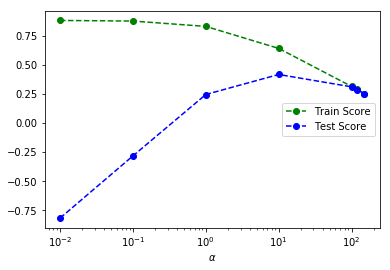

In [57]:
plt.plot(X_range1, train_score_list1, c='g', linestyle = 'dashed', marker = 'o', label = 'Train Score')
plt.plot(X_range1, test_score_list1, c='b', linestyle = 'dashed', marker = 'o', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 5)
plt.xlabel(r'$\alpha$')

In [58]:
lasso = Lasso(alpha = 10)
lasso.fit(X_train_poly, y_train)

print('Accuracy on Train Score: {:.4f}'.format(lasso.score(X_train_poly,y_train)))
print('Accuracy on Test Score: {:.4f}'.format(lasso.score(X_test_poly, y_test)))

Accuracy on Train Score: 0.6414
Accuracy on Test Score: 0.4175


In [59]:
lasso.coef_

array([     0.        , -16024.48763061, -37370.328403  , ...,
            0.        ,      0.        ,    370.54461651])

In [60]:
lasso.intercept_

15908.321924561475

## 5. Random Forest Regressor

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators= 500, max_leaf_nodes= 50, random_state = 0)
rf.fit(X_train, y_train)

print('Accuracy on Train Score:{:.4f}'.format(rf.score(X_train, y_train)))
print('Accuracy on Test Score:{:.4f}'.format(rf.score(X_test,y_test)))

Accuracy on Train Score:0.9030
Accuracy on Test Score:0.6127


# Part 4: Model Selection: Performaction Evaluation

                 Calculate the MSE Score

In [62]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

## a. MSE of Linear Model with Normal Equation

In [63]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)

lreg_predict_y = lreg.predict(X_test)

MSE_lreg = mean_squared_error(y_test, lreg_predict_y)        # mean square error
RMSE_lreg = sqrt(mean_squared_error(y_test, lreg_predict_y)) # root mean square error

print('Mean Square Error of Linear Regression:', MSE_lreg)
print('Root Mean Squared Error of Linear Regression:', RMSE_lreg)

Mean Square Error of Linear Regression: 129160687.39669709
Root Mean Squared Error of Linear Regression: 11364.888358303266


## b. MSE of Polynomial Regression

In [64]:
poly = PolynomialFeatures(2)

X_test_poly = poly.fit_transform(X_test)

lreg.fit(X_train_poly, y_train)
poly_predict_y = lreg.predict(X_test_poly)

MSE_poly = mean_squared_error(y_test, poly_predict_y)
RMSE_poly = sqrt(mean_squared_error(y_test, poly_predict_y))

print('Mean Square Error of Linear Regression:', MSE_poly)
print('Root Mean Squared Error of Linear Regression:', RMSE_poly)

Mean Square Error of Linear Regression: 2.0268197265898634e+30
Root Mean Squared Error of Linear Regression: 1423664190246373.8


## c. MSE of Ridge w/ Polynomial

In [65]:
poly = PolynomialFeatures(2)

ridge = Ridge(alpha = 1)

X_test_poly = poly.fit_transform(X_test)

ridge.fit(X_train_poly, y_train)
ridge_predict_y = ridge.predict(X_test_poly)

MSE_ridge = mean_squared_error(y_test, ridge_predict_y)
RMSE_ridge = sqrt(mean_squared_error(y_test, ridge_predict_y))

print('Mean Square Error of Linear Regression:', MSE_ridge)
print('Root Mean Squared Error of Linear Regression:', RMSE_ridge)

Mean Square Error of Linear Regression: 106770417.22459003
Root Mean Squared Error of Linear Regression: 10332.977171395958


## d. MSE of Lasso w/ Polynomial

In [66]:
poly = PolynomialFeatures(2)

lasso = Lasso(alpha = 10)

X_test_poly = poly.fit_transform(X_test)

lasso.fit(X_train_poly, y_train)
lasso_predict_y = lasso.predict(X_test_poly)

MSE_lasso = mean_squared_error(y_test, lasso_predict_y)
RMSE_lasso = sqrt(mean_squared_error(y_test, lasso_predict_y))

print('Mean Square Error of Linear Regression:', MSE_lasso)
print('Root Mean Squared Error of Linear Regression:', RMSE_lasso)

Mean Square Error of Linear Regression: 101735228.09732556
Root Mean Squared Error of Linear Regression: 10086.388258307607


## e. MSE of Random Forest

In [67]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

rf_predict_y = rf.predict(X_test)

MSE_rf = mean_squared_error(y_test, rf_predict_y)
RMSE_rf = sqrt(mean_squared_error(y_test, rf_predict_y))

print('Mean Square Error of Linear Regression:', MSE_rf)
print('Root Mean Squared Error of Linear Regression:', RMSE_rf)

Mean Square Error of Linear Regression: 64609484.811324805
Root Mean Squared Error of Linear Regression: 8038.002538648816


# Part 5: Feature Importance

                 Random Forest

In [68]:
rf.feature_importances_

array([2.64317418e-01, 1.99280100e-01, 6.71475136e-02, 3.75484165e-02,
       7.17869408e-02, 1.83834612e-02, 1.81259063e-02, 7.89175274e-02,
       2.82152665e-02, 9.54170432e-02, 1.75670571e-02, 1.32283225e-02,
       4.64864809e-04, 1.35856146e-04, 6.71991329e-08, 3.80173329e-04,
       4.33586744e-03, 3.71016469e-03, 2.67906350e-03, 6.11413527e-05,
       7.33561179e-04, 7.76282422e-04, 2.98016922e-03, 9.94239796e-03,
       1.35872209e-03, 2.16370659e-03, 2.07082576e-03, 6.18894358e-03,
       3.18071892e-03, 1.17166157e-02, 3.39813185e-03, 3.12209586e-04,
       4.18475155e-05, 1.16692365e-03, 4.97821678e-04, 2.40962360e-03,
       1.17994980e-04, 7.53676379e-04, 4.32065516e-04, 5.44117042e-04,
       2.88398661e-04, 7.25904833e-04, 1.53730449e-03, 6.67437135e-04,
       1.01493414e-03, 5.50584000e-05, 1.77729798e-04, 1.01615447e-03,
       4.60182552e-03, 4.72137596e-03, 3.03247224e-03, 1.15703528e-03,
       1.48877532e-03, 5.11183306e-03, 1.24785863e-03, 6.67375178e-04])

<IPython.core.display.Javascript object>


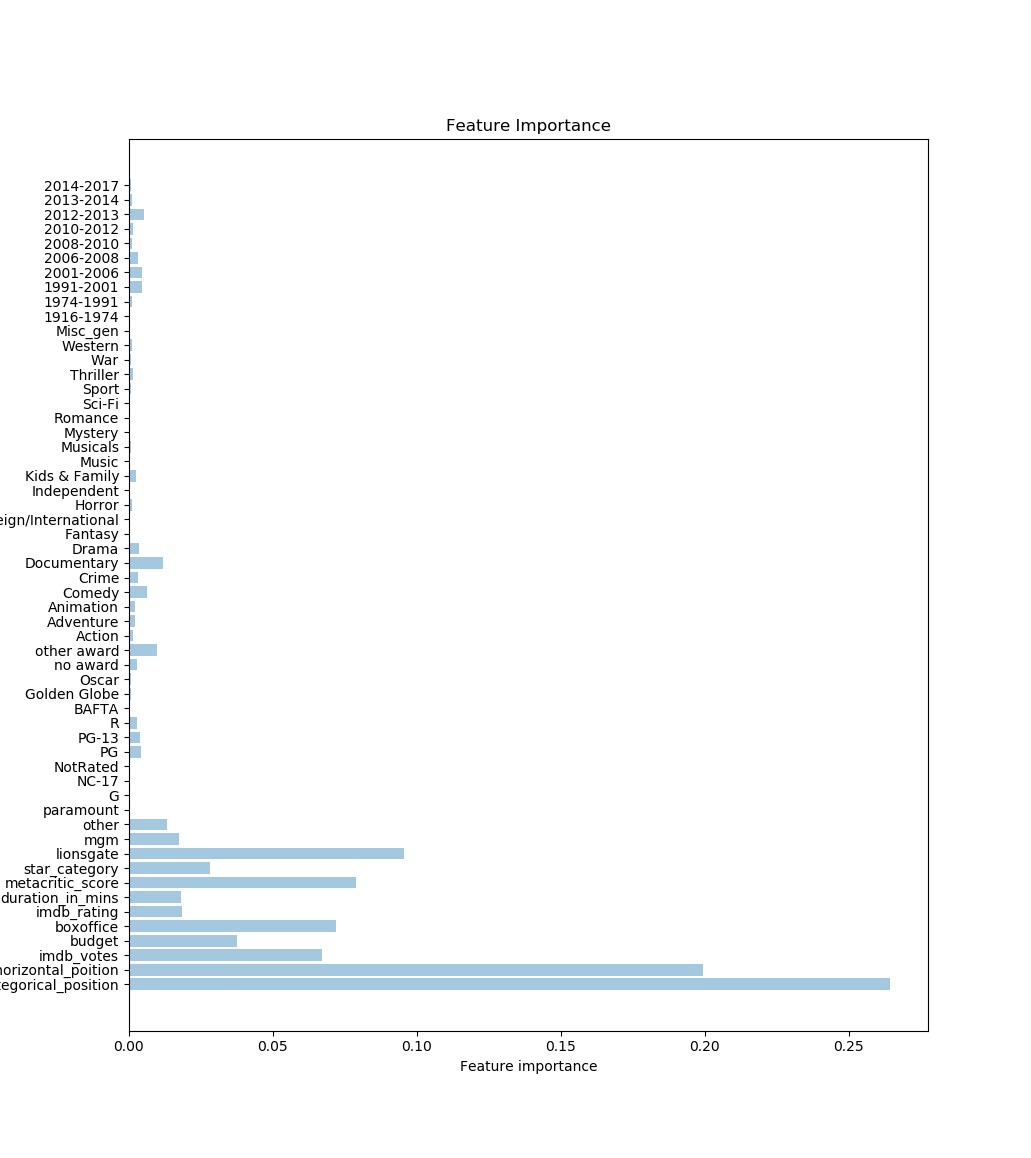

Text(0.5, 1.0, 'Feature Importance')

In [70]:
%matplotlib notebook

importances = rf.feature_importances_
y_pos = np.arange(len(importances))
features = X.columns.get_values()    #X.columns

plt.barh(y_pos, importances, align = 'center', alpha = 0.4,)
plt.yticks(y_pos, features)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.title('Feature Importance')

From the graph above we can see that, surprisigly, the most 2 important features are `weighted_categorical_position` and `weighted_horizontal_position`